# Ingénierie des données - Analyse en composantes principales
## Thierry Khamphousone - 03/12/2020

### Analyse de la base de données

#### 1) Charger la base de données digits disponible dans sklearn

In [1]:
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [4]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
#nombre d'exemple total, image 8x8 (64 features)
print(digits.images.shape)

(1797, 8, 8)


In [6]:
#classes
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [7]:
#nombre d'exemple par classes
nb_exemples_classes = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(len(digits.target)):
    nb_exemples_classes[digits.target[i]]+=1
print(nb_exemples_classes)

[178, 182, 177, 183, 181, 182, 181, 179, 174, 180]


__Dimension des données:__ 64 car une image comporte 8x8 pixels. (64 est donc le nombre de features pour une image)

__Nombre d'exemples total:__ 1797

__Nombre de classes:__ 10 

__Nombre d'exemple par classes:__ environ 180 par classes, (178 pour la première classe, 182 pour la deuxieme, ..., 180 pour la dixième classe) 

In [8]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

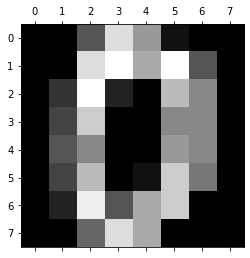

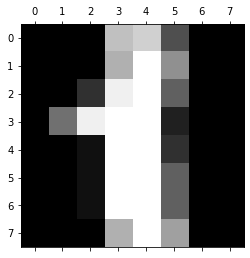

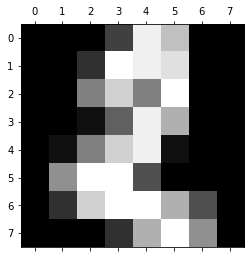

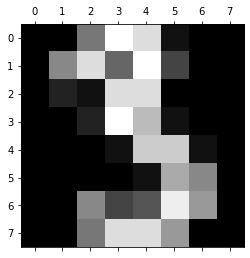

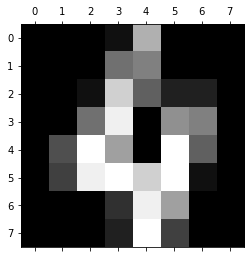

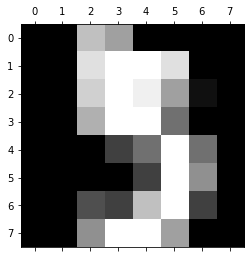

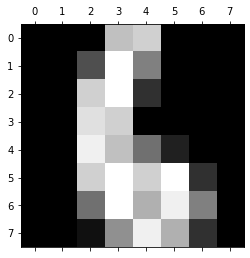

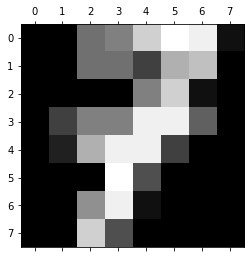

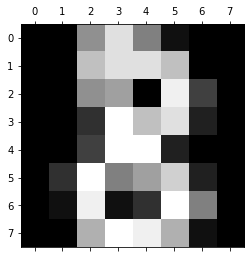

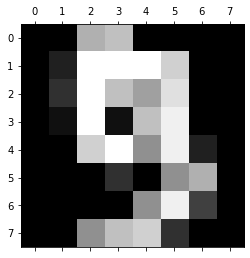

In [9]:
plt.gray()
for i in range(10):
    plt.matshow(digits.images[i])
plt.show()

#### 2) Séparer la base initiale en deux: apprentissage (70%) et test (30%)
#### Utiliser l’algorithme du plus-proche-voisin pour classer les exemples de la base de test.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [11]:
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.7)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    print(knn.score(X_test, y_test))

0.987037037037037
0.9796296296296296
0.9888888888888889
0.9888888888888889
0.9925925925925926


En répétant plusieurs fois la procédure de partition-classification avec un random seed non défini, on obtient toujours un score de prédiction de 99% sur la base de test. 

On en déduit que quelque soit la base d'entrainement utilisé pour entrainer le modèle, l'algorithme knn avec k=1 produit toujours un score environ égale à 99% de précision.

### Analyse en composantes principales

#### 1) Utiliser le solveur PCA de sklearn pour réaliser la PCA

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

In [13]:
#matrice de covariance avec 64 features 
pca_cov = PCA(n_components=64)

#ratio inertie expliquée (%)
pca_cov.fit(X_train)

eigval = pca_cov.explained_variance_
print("\nexplained variance (valeurs propres):\n", np.round(eigval, decimals=4))


explained variance (valeurs propres):
 [1.852725e+02 1.627724e+02 1.353541e+02 9.729660e+01 6.917800e+01
 5.893600e+01 5.419500e+01 4.394150e+01 3.943550e+01 3.631630e+01
 2.973950e+01 2.650140e+01 2.206760e+01 2.121620e+01 1.750190e+01
 1.712510e+01 1.564290e+01 1.427410e+01 1.251600e+01 1.065780e+01
 1.046980e+01 9.716200e+00 9.405900e+00 8.663900e+00 7.987300e+00
 7.279500e+00 6.816500e+00 5.927100e+00 5.711400e+00 5.040600e+00
 4.367900e+00 4.172600e+00 3.983400e+00 3.840100e+00 3.580300e+00
 3.356800e+00 3.030700e+00 2.712400e+00 2.593000e+00 2.428700e+00
 2.210900e+00 1.807800e+00 1.769900e+00 1.669000e+00 1.411500e+00
 1.256400e+00 1.159500e+00 8.775000e-01 6.862000e-01 4.462000e-01
 2.286000e-01 1.021000e-01 4.480000e-02 4.020000e-02 2.270000e-02
 8.800000e-03 6.800000e-03 4.600000e-03 9.000000e-04 5.000000e-04
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]


In [14]:
total_eigval = np.max(np.cumsum(eigval)); total_eigval

1194.7794719000347

afin de connaitre le pourcentage d'inertie expliquée pour chaque axe, on divise chaque valeur propre par __total_eigval__. 

In [15]:
inertie_expliquee_pourcent = eigval[:]/total_eigval; inertie_expliquee_pourcent

array([1.55068358e-01, 1.36236322e-01, 1.13287951e-01, 8.14347521e-02,
       5.79002561e-02, 4.93279471e-02, 4.53598362e-02, 3.67779226e-02,
       3.30065394e-02, 3.03958122e-02, 2.48912199e-02, 2.21810268e-02,
       1.84700103e-02, 1.77574276e-02, 1.46486656e-02, 1.43333114e-02,
       1.30927495e-02, 1.19470237e-02, 1.04755457e-02, 8.92030503e-03,
       8.76299684e-03, 8.13222709e-03, 7.87252802e-03, 7.25145997e-03,
       6.68515355e-03, 6.09274928e-03, 5.70522356e-03, 4.96086106e-03,
       4.78033068e-03, 4.21881476e-03, 3.65578212e-03, 3.49234464e-03,
       3.33402482e-03, 3.21406989e-03, 2.99662111e-03, 2.80953123e-03,
       2.53658847e-03, 2.27018354e-03, 2.17024653e-03, 2.03275292e-03,
       1.85042862e-03, 1.51306215e-03, 1.48137562e-03, 1.39689370e-03,
       1.18137003e-03, 1.05160246e-03, 9.70506478e-04, 7.34405839e-04,
       5.74294150e-04, 3.73464387e-04, 1.91336581e-04, 8.54589717e-05,
       3.74779545e-05, 3.36804940e-05, 1.90334759e-05, 7.37201378e-06,
      

On ne doit utiliser que la base d'apprentissage et pas toutes les données pour faire ce traitement car appliquer la PCA va transformer nos données en nous permettant de choisir les meilleures features qui expliquent une plus grande variance.

La PCA a pour avantage de réduire le nombre de données à traiter en réduisant le nombre de features en entrée, permettant de réduire le nombre et le temps de calcul. 

Il est donc très avantageux d'utiliser la PCA sur une base d'entraînement et de calculer uniquement sur les principales features. Il est donc inutile de le faire sur une base de test étant donné que la base de test va nous permettre de tester notre modèle et non d'en faire des calculs.

#### 2) Tracer le graphe de l’inertie expliquée en fonction du rang de la valeur propre.

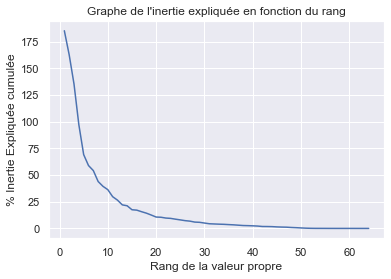

In [16]:
plt.ylabel('% Inertie Expliquée cumulée')
plt.xlabel('Rang de la valeur propre')
plt.title("Graphe de l'inertie expliquée en fonction du rang")

plt.plot(np.arange(1,65), eigval);

#### Peut-on appliquer le critère de Catell pour déterminer le nombre optimal de composantes à conserver ?

Non il n'est pas possible d'appliquer le critère de Catell afin de déterminer le nombre optimal de composantes à conserver car nous avons un trop grand nombre de features ici. (64 features)
De plus, le coude de la courbe est très difficile à déterminer car la courbe est lisse.

__Catell Scree__ est surtout utilisée pour des __problèmes de petites dimensions__ 

#### 3) Calculer l’inertie cumulée en considérant M axes (M < Dim)

In [17]:
#somme cumulée de la variance expliquée pour 64 features
var=np.cumsum(np.round(pca_cov.explained_variance_ratio_, decimals=4)*100); print("Somme cumulée de l'inertie expliquée:\n",var)

Somme cumulée de l'inertie expliquée:
 [ 15.51  29.13  40.46  48.6   54.39  59.32  63.86  67.54  70.84  73.88
  76.37  78.59  80.44  82.22  83.68  85.11  86.42  87.61  88.66  89.55
  90.43  91.24  92.03  92.76  93.43  94.04  94.61  95.11  95.59  96.01
  96.38  96.73  97.06  97.38  97.68  97.96  98.21  98.44  98.66  98.86
  99.05  99.2   99.35  99.49  99.61  99.72  99.82  99.89  99.95  99.99
 100.01 100.02 100.02 100.02 100.02 100.02 100.02 100.02 100.02 100.02
 100.02 100.02 100.02 100.02]


#### Tracer le graphe de l’inertie cumulée en fonction du rang de la valeur propre et appliquer le critère de Joliffe (à 90%, par exemple) pour déterminer le nombre optimal de composantes à conserver.

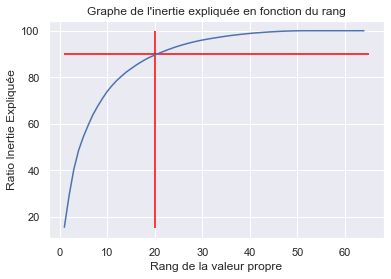

In [18]:
plt.ylabel('Ratio Inertie Expliquée')
plt.xlabel('Rang de la valeur propre')
plt.title("Graphe de l'inertie expliquée en fonction du rang")
plt.hlines(90, 1, 65,colors='red', linestyles='solid')
plt.vlines(20, 15, 100,colors='red', linestyles='solid')
plt.plot(np.arange(1,65), var);

En gardant __90% de l'inertie en traçant la ligne rouge__, on obtient __un rang de la valeur propre égal à 20__ qui représente le nombre __optimal de composantes à conserver__.

### Classification

#### 1) Evaluer, pour les valeurs de M trouvées précédemment, le taux de reconnaissance obtenu par un classifieur 1-ppv lorsque les données (bases de référence et de test) sont codées par les M premières composantes principales. 

#### Pour ce faire, on projettera les données de l’espace initial dans l’espace de dimension à l’aide de la matrice de passage réduite PM avant d’appliquer l’algorithme de classification


Déterminons d'abord le M premières composantes principales.
Nous savons qu'il nous faut les 30 premières composantes (M=30). 

Les vecteurs propres représentent les axes principaux d'inerties.

In [19]:
print("Exemple du 1er Vecteur Propre e1 de la Matrice P:\n", pca_cov.components_[0:1])

Exemple du 1er Vecteur Propre e1 de la Matrice P:
 [[-1.02504660e-19  1.62701657e-02  2.21840369e-01  1.38692070e-01
   2.35058448e-02  9.20564484e-02  7.37538289e-03 -2.12199216e-03
   1.66055857e-04  1.17150522e-01  2.46874821e-01 -1.44079657e-01
   4.20857650e-02  2.15046555e-01  1.38101735e-02 -4.63200876e-03
   7.45036005e-05  7.73873029e-02 -8.19895519e-02 -2.11195866e-01
   1.66022881e-01  1.54944707e-01 -3.46501755e-02 -4.89785141e-03
  -1.37072482e-04 -6.78352767e-02 -2.49248806e-01  4.16452172e-02
   2.01955493e-01  2.18606445e-02 -5.89634473e-02 -7.44797651e-05
  -0.00000000e+00 -1.65795875e-01 -3.66584338e-01 -1.58534667e-01
  -9.24413810e-02 -4.75649766e-02 -2.44956709e-02 -0.00000000e+00
  -1.48936618e-03 -1.08799032e-01 -2.93199035e-01 -2.47589861e-01
  -2.25113852e-01 -1.15468622e-02  4.61530797e-02 -7.16598562e-04
  -1.52362039e-04  7.40384596e-03  7.21689967e-02 -8.52480913e-02
  -1.20668116e-01  1.51780365e-01  7.36747438e-02  4.24244536e-04
  -1.40204223e-05  1.3155

In [20]:
PM=pca_cov.components_[0:30]

Afin de projeter les données de l'espace initial dans l'espace de dimension, il faut maintenant multiplier notre matrice initiale d'entrainement (taille 1257 et 64 features) contenant les données par la matrice PM (taille 30 et 64 features) qui contient les valeurs propres

Maintenant que les données de base X_train et de test X_test sont codées par les M premières composantes principales,

In [21]:
#la transposée ici permet de multiplier la feature de X_train avec ses premieres composantes
X_train_dim = X_train.dot(np.transpose(PM))
X_test_dim = X_test.dot(np.transpose(PM))

Appliquons l'algorithme de classification dessus.

In [22]:
knn_dim = KNeighborsClassifier(n_neighbors=1)
knn_dim.fit(X_train_dim, y_train)
print(knn_dim.score(X_test_dim, y_test))

0.9925925925925926


on obtient un score de prédiction de 98% sur la base de test en ayant effectué les calculs avec notre modèle sur 30 features au lieu de 64 features. 

Cela prouve donc bien qu'on a pu se débarasser de 34 features afin de diminuer le temps des calculs tout en conservant une bonne précision.

#### 2) Etendre l'analyse précédente en faisant varier M de 1 à Dim. 

In [23]:
taux_reconnaissance = []
for i in range (1, 31):
    PM=pca_cov.components_[0:i]
    X_train_dim = X_train.dot(np.transpose(PM))
    X_test_dim = X_test.dot(np.transpose(PM))
    
    knn_dim = KNeighborsClassifier(n_neighbors=1)
    knn_dim.fit(X_train_dim, y_train)
    taux_reconnaissance.append(knn_dim.score(X_test_dim, y_test))
    print(taux_reconnaissance[i-1])

0.2833333333333333
0.5611111111111111
0.7111111111111111
0.8203703703703704
0.8833333333333333
0.9203703703703704
0.9555555555555556
0.9648148148148148
0.9740740740740741
0.9777777777777777
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9851851851851852
0.987037037037037
0.9888888888888889
0.9907407407407407
0.9944444444444445
0.9925925925925926
0.9925925925925926
0.9907407407407407
0.9907407407407407
0.9907407407407407
0.9907407407407407
0.9925925925925926
0.9925925925925926
0.9925925925925926
0.9925925925925926
0.9925925925925926
0.9925925925925926


#### Tracer le graphe montrant la variation du taux de reconnaissance en fonction de M. Conclure

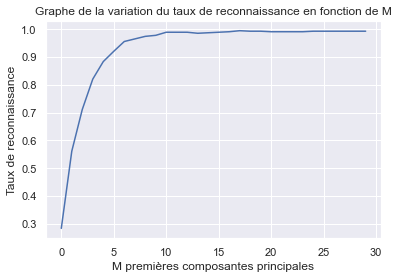

In [24]:
plt.ylabel('Taux de reconnaissance')
plt.xlabel('M premières composantes principales')
plt.title("Graphe de la variation du taux de reconnaissance en fonction de M")
plt.plot(taux_reconnaissance);

On observe qu'avec 1, 2, 3, 4 et 5 composantes principales, le modèle n'obtient pas un bon score de précision. 
Par contre le taux de reconnaissance commence à devenir bon dès 6 composantes principales.

## Compression

#### 1) Compresser une image sur M composantes principales à l’aide de la matrice de passage réduite PM puis, reconstruire une image (de dimension Dim) à l’aide de ces M composantes principales. Conclure.

Travaillons sur l'image représentant __le chiffre 5__.

Récupérons dans un premier temps, une base d'image de chiffre 5.

In [25]:
image_5 = digits.images[5]; print(image_5) #choix du chiffre
data_5 = digits.data[5]; print(data_5) #choix du chiffre

[[ 0.  0. 12. 10.  0.  0.  0.  0.]
 [ 0.  0. 14. 16. 16. 14.  0.  0.]
 [ 0.  0. 13. 16. 15. 10.  1.  0.]
 [ 0.  0. 11. 16. 16.  7.  0.  0.]
 [ 0.  0.  0.  4.  7. 16.  7.  0.]
 [ 0.  0.  0.  0.  4. 16.  9.  0.]
 [ 0.  0.  5.  4. 12. 16.  4.  0.]
 [ 0.  0.  9. 16. 16. 10.  0.  0.]]
[ 0.  0. 12. 10.  0.  0.  0.  0.  0.  0. 14. 16. 16. 14.  0.  0.  0.  0.
 13. 16. 15. 10.  1.  0.  0.  0. 11. 16. 16.  7.  0.  0.  0.  0.  0.  4.
  7. 16.  7.  0.  0.  0.  0.  0.  4. 16.  9.  0.  0.  0.  5.  4. 12. 16.
  4.  0.  0.  0.  9. 16. 16. 10.  0.  0.]


<Figure size 432x288 with 0 Axes>

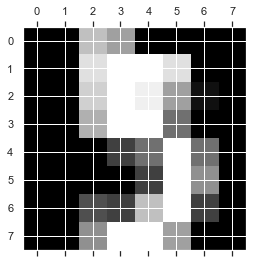

In [26]:
plt.gray()
plt.matshow(image_5)
plt.show()

Déterminons maintenant ses M composantes principales.
Pour cela nous avons besoin de récupérer une base de données d'images 5.

In [27]:
image_5.shape

(8, 8)

In [28]:
data_5.shape[0]

64

In [29]:
X5 = []
for i in range(len(digits.data)):
    if digits.target[i] == 5: #choix du chiffre
        X5.append(digits.data[i].tolist())

X5 = np.array(X5); 
X5.shape

(182, 64)

on retrouve bien le nombre 182 qui correspond au nombre de 5 identifié dans la base de données au début du TP, et 64 est le nombre de features.

Calculons l'image moyenne de 5.

In [30]:
X5

array([[ 0.,  0., 12., ..., 10.,  0.,  0.],
       [ 0.,  5., 12., ...,  0.,  0.,  0.],
       [ 0.,  0., 12., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0., 12., ...,  4.,  0.,  0.],
       [ 0.,  0.,  1., ...,  4.,  0.,  0.],
       [ 0.,  0., 10., ...,  4.,  0.,  0.]])

In [31]:
X5_mean = [] #Image moyenne en 64 x 1
for i in range(len(X5[0])):
    X5_mean.append(np.mean(X5[:,i]))

In [32]:
imageX5_mean = [] #Image moyenne en 8x8
temp = []
for i in range(1, len(X5_mean)):
    temp.append(X5_mean[i])
    if i%8 == 0:
        imageX5_mean.append(temp[:])
        temp = []
        
imageX5_mean = np.array(imageX5_mean)

<Figure size 432x288 with 0 Axes>

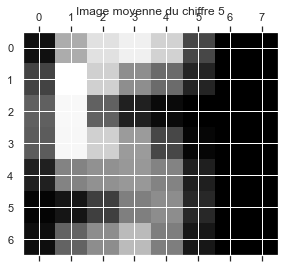

In [33]:
plt.gray()
plt.matshow(imageX5_mean)
plt.title('Image moyenne du chiffre 5')
plt.show()

In [34]:
#matrice de covariance avec 64 features 
data_5_pca_cov = PCA(n_components=X5.shape[1])

#ratio inertie expliquée (%)
data_5_pca_cov.fit(X5)

eigval_5 = data_5_pca_cov.explained_variance_

In [35]:
var_5=np.cumsum(np.round(data_5_pca_cov.explained_variance_ratio_, decimals=4)*100); print("Somme cumulée de l'inertie expliquée:\n",var_5)

Somme cumulée de l'inertie expliquée:
 [30.84 42.29 52.9  59.1  64.61 69.13 73.05 76.58 79.32 81.73 83.74 85.51
 87.1  88.34 89.54 90.7  91.65 92.52 93.24 93.88 94.48 95.01 95.5  95.95
 96.35 96.72 97.08 97.38 97.67 97.94 98.19 98.41 98.61 98.8  98.98 99.14
 99.28 99.41 99.52 99.62 99.72 99.8  99.84 99.88 99.91 99.94 99.96 99.97
 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98
 99.98 99.98 99.98 99.98]


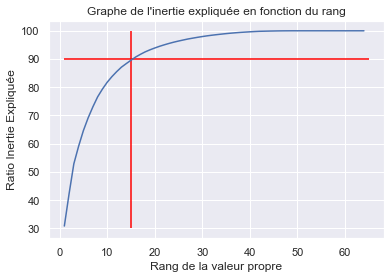

In [36]:
plt.ylabel('Ratio Inertie Expliquée')
plt.xlabel('Rang de la valeur propre')
plt.title("Graphe de l'inertie expliquée en fonction du rang")
plt.hlines(90, 1, 65,colors='red', linestyles='solid')
plt.vlines(15, 30, 100,colors='red', linestyles='solid')
plt.plot(np.arange(1,65), var_5);

On lit sur le graphe de l'inertie expliquée en fonction du rang qu'il nous faut 15 composantes principales. 

In [37]:
Comp_Princ = 15
PM5 = pca_cov.components_[0:Comp_Princ]; PM5

array([[-1.02504660e-19,  1.62701657e-02,  2.21840369e-01,
         1.38692070e-01,  2.35058448e-02,  9.20564484e-02,
         7.37538289e-03, -2.12199216e-03,  1.66055857e-04,
         1.17150522e-01,  2.46874821e-01, -1.44079657e-01,
         4.20857650e-02,  2.15046555e-01,  1.38101735e-02,
        -4.63200876e-03,  7.45036005e-05,  7.73873029e-02,
        -8.19895519e-02, -2.11195866e-01,  1.66022881e-01,
         1.54944707e-01, -3.46501755e-02, -4.89785141e-03,
        -1.37072482e-04, -6.78352767e-02, -2.49248806e-01,
         4.16452172e-02,  2.01955493e-01,  2.18606445e-02,
        -5.89634473e-02, -7.44797651e-05, -0.00000000e+00,
        -1.65795875e-01, -3.66584338e-01, -1.58534667e-01,
        -9.24413810e-02, -4.75649766e-02, -2.44956709e-02,
        -0.00000000e+00, -1.48936618e-03, -1.08799032e-01,
        -2.93199035e-01, -2.47589861e-01, -2.25113852e-01,
        -1.15468622e-02,  4.61530797e-02, -7.16598562e-04,
        -1.52362039e-04,  7.40384596e-03,  7.21689967e-0

In [38]:
compressed = (data_5 - X5_mean).dot(np.transpose(PM5))

In [39]:
print(compressed)

[ 11.37684937   7.2916869   -0.11282158 -26.64917616  -6.96012442
  -8.72998133   4.70322655   4.81258409   2.6394353  -11.47477958
   3.72283207  -3.36300714   1.90821011  -1.90478322   9.8878767 ]


In [40]:
recomposed = np.add(X5_mean, compressed.dot(PM5))

In [41]:
image_recomposed = [] #Image recomposee en 8x8
recomposed #Image recomposee en 64 x 1
temp = []
for i in range(1, len(recomposed)):
    temp.append(recomposed[i])
    if i%8 == 0:
        image_recomposed.append(temp[:])
        temp = []
        
image_recomposed = np.array(image_recomposed)

<Figure size 432x288 with 0 Axes>

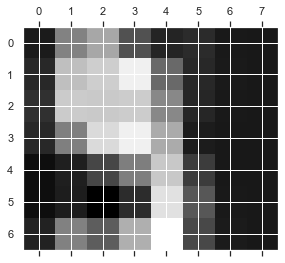

In [42]:
plt.gray()
plt.matshow(image_recomposed)
plt.show()

Nous avons compressé une image 5 et nous l'avons directement par la suite décompressé afin de le reconstruire. 
On remarque que l'image reconstruite n'est pas exactement la même image que celle d'origine, mais on peut reconnaître certains traits caractéristiques du chiffre 5. 

__Compression :__ C = PMT (X – m)

__Decompression:__ D ≈ m + PM C

avec : 

- C le compressé
- PMT la transposée de la matrice PM
- PM la matrice contenant les vecteurs propres (e1, e2, e3, ...)
- X l'image d'origine qu'on souhaite compresser/decompresser
- m l'image moyenne  
- D l'image décompressée qui ressemble à l'image d'origine X

#### 2) Calculer l’erreur de reconstruction : erreur normalisée entre l’image originale et l’image reconstruite.

__La Normalisation :__

__X_normalisee = (X - X_min)/(X_max - X_min)__

avec: 

- X_min : la plus petite valeur observée pour la feature X
- X_max : la plus grande valeur observée pour la feature X
- X : La valeur de la feature qu’on cherche à normaliser

__La Standardisation :__

__X_standardisee = (X - mu)/sigma__

avec: 

- X : la valeur qu'on veut standardiser
- mu : la moyenne des observations pour la feature X
- sigma : L'écart-type des observations pour la feature X

In [43]:
def distance_euclidienne(pt1, pt2):
    '''
    Euclidian distance between two points
    '''
    
    if not isinstance(pt1, np.ndarray) and not isinstance(pt2, np.ndarray):
        raise TypeError("inputs must be np.ndarray")
    if(len(pt1)!=len(pt2)):
        raise ValueError("inputs must have the same dimension")
    else:
        return np.sqrt(np.sum((pt1 - pt2)**2))

In [44]:
error = distance_euclidienne(data_5, recomposed)/len(data_5)
print("erreur de reconstruction:", error)

erreur de reconstruction: 0.23805499826846857


#### 3) Etendre l’analyse précédente en faisant varier M de 1 à Dim. Tracer le graphe montrant, pour une image, la variation de l’erreur de reconstruction en fonction de M.

In [45]:
variation_erreur = []
for i in range(Comp_Princ):
    PM5 = pca_cov.components_[0:i];
    compressed = (data_5 - X5_mean).dot(np.transpose(PM5))
    recomposed = np.add(X5_mean, compressed.dot(PM5))
    error = distance_euclidienne(data_5, recomposed)/len(data_5)
    variation_erreur.append(error)

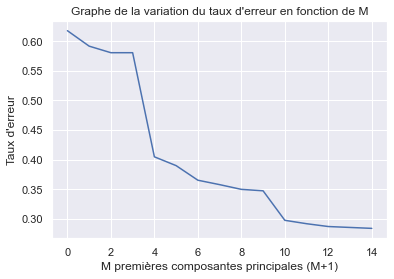

In [46]:
plt.ylabel("Taux d'erreur")
plt.xlabel('M premières composantes principales (M+1)')
plt.title("Graphe de la variation du taux d'erreur en fonction de M")
plt.plot(variation_erreur);

D'après le graphe de la variation du taux d'erreur en fonction de M, on remarque que le taux d'erreur diminue lorsque le nombre de M premières composantes principales augmente.